In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *


In [64]:
emi_com = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")
temp = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp_trend.csv")


In [65]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,15083,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,13861,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,9583,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,10194,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,11416,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


In [45]:
# Cleaning oil data every time code: 

emi_com['Date'] = pd.to_datetime(emi_com['Date'])



In [46]:
temp.drop('Unnamed: 0', axis=1, inplace=True)
temp.rename(columns={'date': 'Date'}, inplace=True) 
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
#temp = temp[temp.index.year >= 1973]
temp['anomaly_squared'] = temp['anomaly'] ** 2



In [47]:
df = pd.merge(temp, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19031 entries, 0 to 19030
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19031 non-null  datetime64[ns]
 1   anomaly                        19031 non-null  float64       
 2   anomaly_squared                19031 non-null  float64       
 3   Unnamed: 0                     19031 non-null  int64         
 4   Consumption (quadrillion Btu)  19031 non-null  float64       
 5   Energy Type                    19031 non-null  object        
 6   Energy Class                   19031 non-null  object        
 7   Sector                         19031 non-null  object        
 8   Emission (Mton Co2)            19031 non-null  float64       
 9   Emission per Consumption       18501 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [48]:
df

,Date,anomaly,anomaly_squared,Unnamed: 0,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,-0.274042,0.075099,0,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,1973-01-01,-0.274042,0.075099,15083,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,1973-01-01,-0.274042,0.075099,18749,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,1973-01-01,-0.274042,0.075099,14472,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,1973-01-01,-0.274042,0.075099,13861,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...,...,...
19026,2015-11-01,1.952458,3.812094,2347,0.087742,Distillate Fuel Oil,Petroleum,Commercial,3.281,37.393687
19027,2015-11-01,1.952458,3.812094,21887,0.000000,Coal,Coal,Transportation,0.000,NaN
19028,2015-11-01,1.952458,3.812094,18041,0.292874,Natural Gas,Natural Gas,Commercial,15.519,52.988720
19029,2015-11-01,1.952458,3.812094,22486,0.939181,Coal,Coal,Electric Power,89.457,95.249991


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19031 entries, 0 to 19030
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19031 non-null  datetime64[ns]
 1   anomaly                        19031 non-null  float64       
 2   anomaly_squared                19031 non-null  float64       
 3   Unnamed: 0                     19031 non-null  int64         
 4   Consumption (quadrillion Btu)  19031 non-null  float64       
 5   Energy Type                    19031 non-null  object        
 6   Energy Class                   19031 non-null  object        
 7   Sector                         19031 non-null  object        
 8   Emission (Mton Co2)            19031 non-null  float64       
 9   Emission per Consumption       18501 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [50]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [51]:
df.drop(['Energy Type'], axis =1, inplace=True)

In [52]:
df.drop(['Sector'], axis =1, inplace=True)

<Axes: xlabel='anomaly', ylabel='Emission per Consumption'>

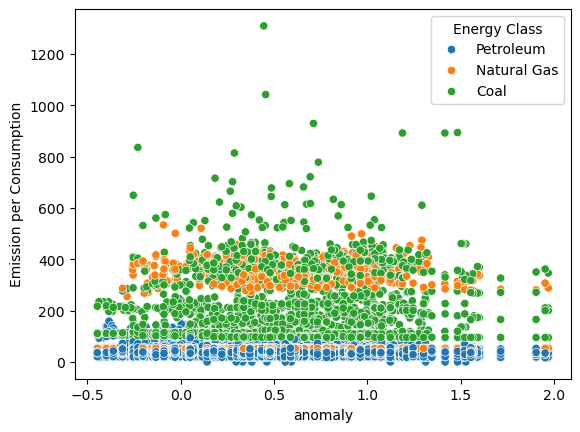

In [53]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly"], hue=df['Energy Class'])

<Axes: xlabel='anomaly_squared', ylabel='Emission per Consumption'>

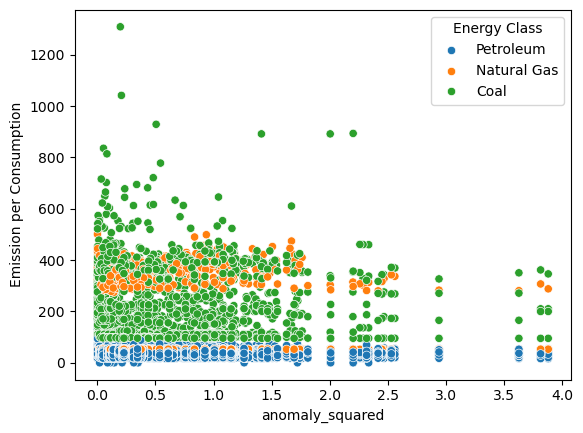

In [54]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly_squared"], hue=df['Energy Class'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19031 entries, 0 to 19030
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19031 non-null  datetime64[ns]
 1   anomaly                        19031 non-null  float64       
 2   anomaly_squared                19031 non-null  float64       
 3   Consumption (quadrillion Btu)  19031 non-null  float64       
 4   Energy Class                   19031 non-null  object        
 5   Emission (Mton Co2)            19031 non-null  float64       
 6   Emission per Consumption       18501 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.0+ MB


<Axes: >

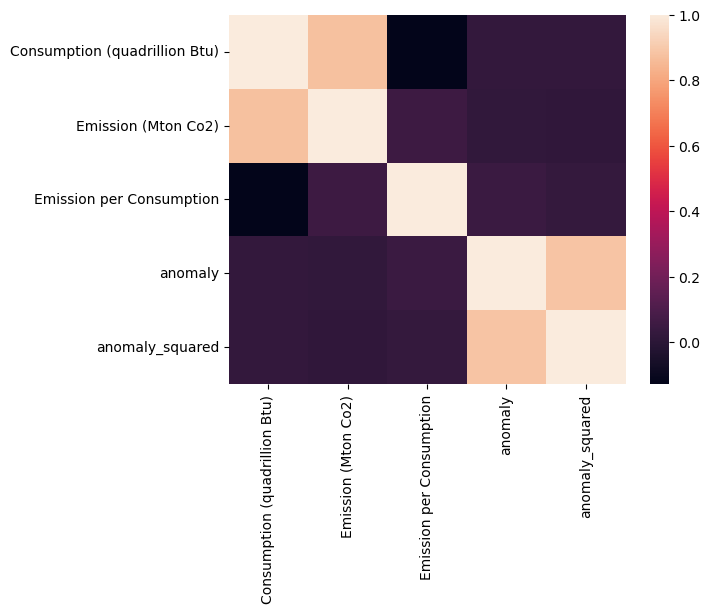

In [56]:
sns.heatmap(df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emission per Consumption',	'anomaly',	'anomaly_squared']].corr())

<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

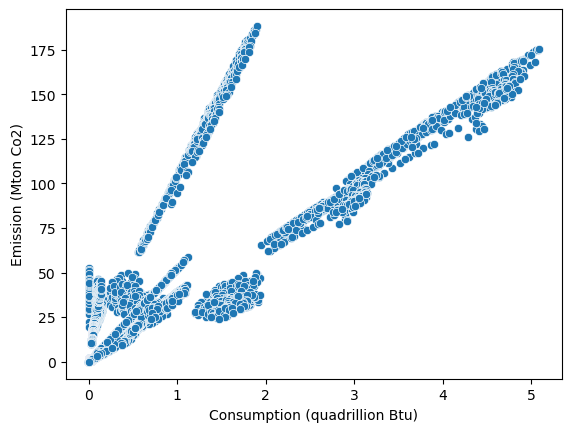

In [57]:
sns.scatterplot(x=df['Consumption (quadrillion Btu)'],y=df['Emission (Mton Co2)'])

<Axes: xlabel='Date'>

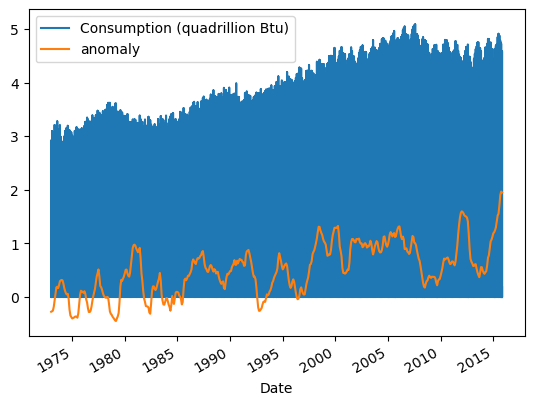

In [58]:
df.plot(x='Date',y=['Consumption (quadrillion Btu)','anomaly'])
# cosumption causes anomaly 

<Axes: xlabel='Date', ylabel='anomaly'>

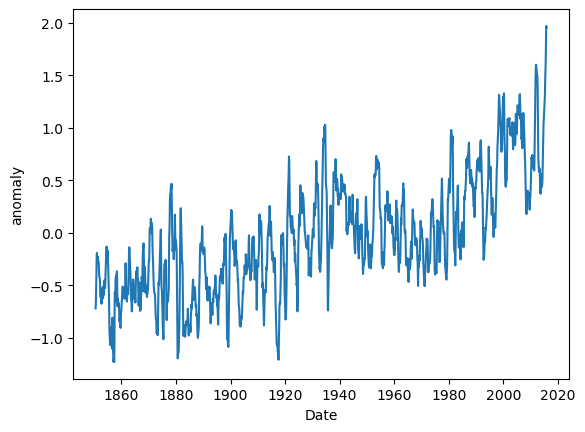

In [59]:
sns.lineplot(x='Date', y='anomaly', data=temp)


In [60]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,-0.274042,0.075099,0.586164,Petroleum,22.796,38.890148
1,1973-01-01,-0.274042,0.075099,0.002308,Petroleum,0.128,55.459511
2,1973-01-01,-0.274042,0.075099,0.231730,Natural Gas,12.163,52.487917
3,1973-01-01,-0.274042,0.075099,0.062117,Petroleum,2.397,38.588744
4,1973-01-01,-0.274042,0.075099,2.921715,Petroleum,101.775,34.833999
...,...,...,...,...,...,...,...
19026,2015-11-01,1.952458,3.812094,0.087742,Petroleum,3.281,37.393687
19027,2015-11-01,1.952458,3.812094,0.000000,Coal,0.000,NaN
19028,2015-11-01,1.952458,3.812094,0.292874,Natural Gas,15.519,52.988720
19029,2015-11-01,1.952458,3.812094,0.939181,Coal,89.457,95.249991


In [61]:
temp.reset_index(inplace=True)

In [62]:
temp.drop(['index'],axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
temp

,Date,anomaly
0,1973-07-01,0.179917
1,1973-08-01,0.193167
2,1973-09-01,0.167375
3,1973-10-01,0.218208
4,1973-11-01,0.295167
...,...,...
504,2015-07-01,1.553917
505,2015-08-01,1.714125
506,2015-09-01,1.904042
507,2015-10-01,1.969167


In [ ]:
temp

,anomaly
Date,
1973-07-01,NaN
1973-08-01,0.179917
1973-09-01,0.193167
1973-10-01,0.167375
1973-11-01,0.218208
...,...
2015-07-01,1.521792
2015-08-01,1.553917
2015-09-01,1.714125


In [ ]:
#temp['lag_1'],_,_ = 

def lag(x):
    temp= temp.set_index(["Date"]).shift(x)
    x = pd.merge(temp, emi_com, on='Date', how='inner')

In [ ]:
temp

,anomaly
Date,
1973-07-01,NaN
1973-08-01,0.179917
1973-09-01,0.193167
1973-10-01,0.167375
1973-11-01,0.218208
...,...
2015-07-01,1.521792
2015-08-01,1.553917
2015-09-01,1.714125


In [ ]:
x

0      Date                             1973-07-01 00:00:00
       index                                              6
       anomaly                                     0.179917
       anomaly_squared                              0.03237
       Consumption (quadrillion Btu)               0.517148
                                               ...         
18814  anomaly_squared                             3.812094
       Consumption (quadrillion Btu)               0.000057
       Energy Class                               Petroleum
       Emission (Mton Co2)                            0.002
       Emission per Consumption                   34.874941
Length: 150520, dtype: object